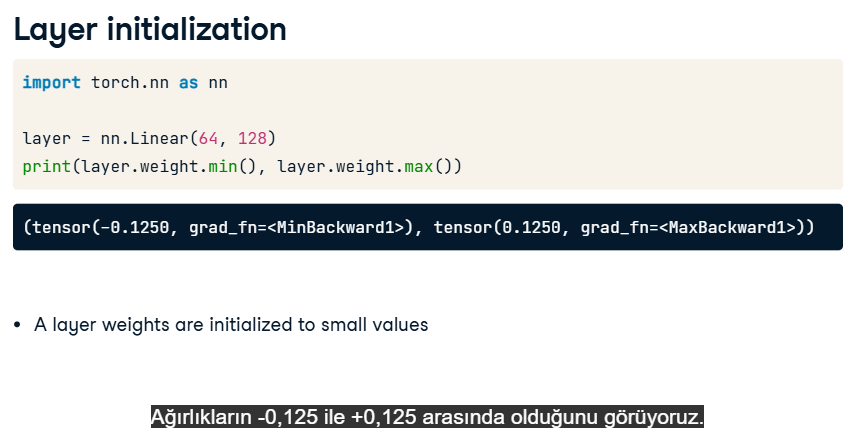

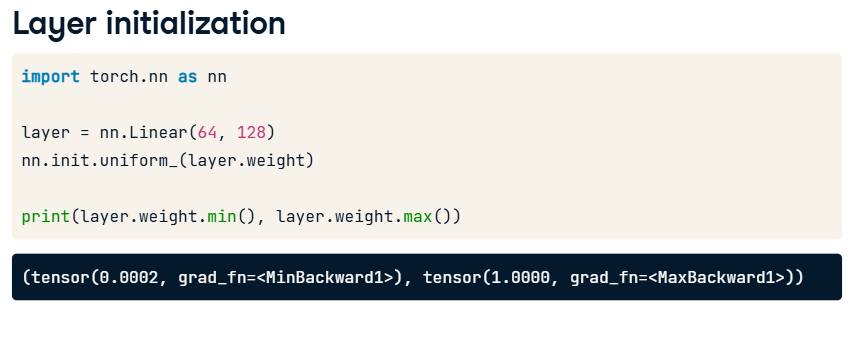

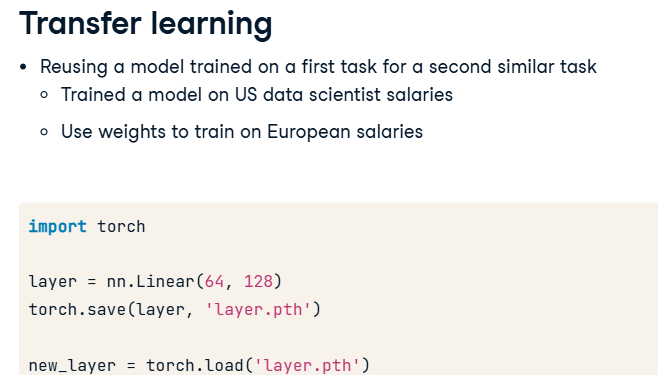

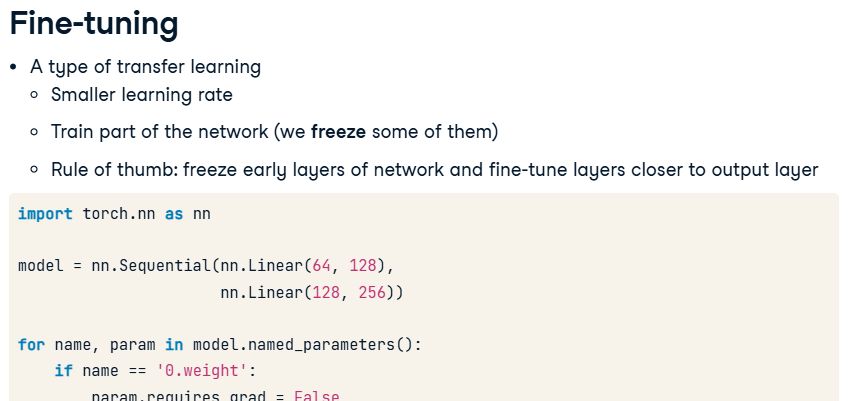

In [ ]:
for name, param in model.named_parameters():

    # Check for first layer's weight
    if name == '0.weight':

        # Freeze this weight
        param.requires_grad = False

    # Check for second layer's weight
    if name == '1.weight':

        # Freeze this weight
        param.requires_grad = False

In [ ]:
layer0 = nn.Linear(16, 32)
layer1 = nn.Linear(32, 64)

# Use uniform initialization for layer0 and layer1 weights
nn.init.uniform_(layer0.weight)
nn.init.uniform_(layer1.weight)

model = nn.Sequential(layer0, layer1)

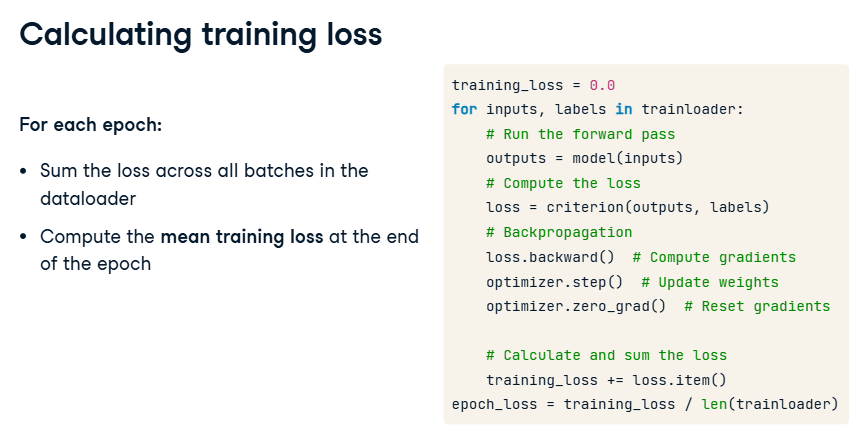

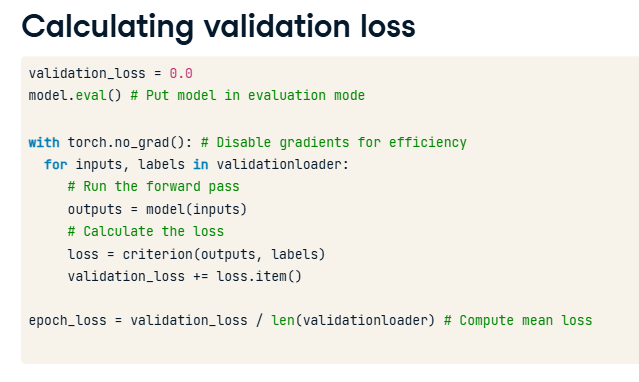

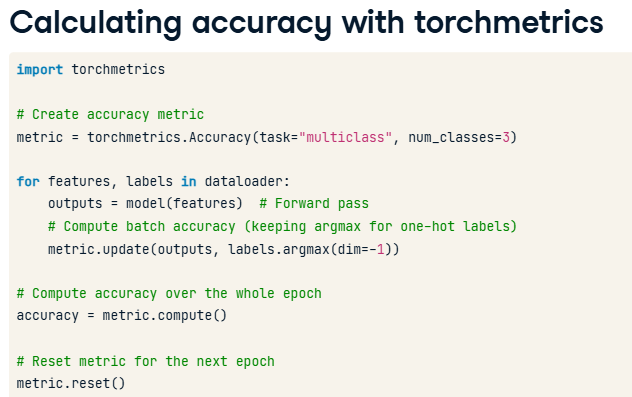

In [ ]:
# Set the model to evaluation mode
model.eval()
validation_loss = 0.0

with torch.no_grad():

  for features, labels in validationloader:

      outputs = model(features)
      loss = criterion(outputs, labels)

      # Sum the current loss to the validation_loss variable
      validation_loss += loss.item()

In [ ]:
# Set the model to evaluation mode
model.eval()
validation_loss = 0.0

with torch.no_grad():
  for features, labels in validationloader:
      outputs = model(features)
      loss = criterion(outputs, labels)
      # Sum the current loss to the validation_loss variable
      validation_loss += loss.item()

# Calculate the mean loss value
validation_loss_epoch = validation_loss/len(validationloader)
print(validation_loss_epoch)

# Set the model back to training mode
model.train()

In [ ]:
# Create accuracy metric
metric = torchmetrics.Accuracy(task="multiclass", num_classes=3)
for features, labels in dataloader:
    outputs = model(features)

    # Calculate accuracy over the batch
    metric.update(outputs, labels.argmax(dim=-1))

# Calculate accuracy over the whole epoch
accuracy = metric.compute()
print(f"Accuracy on all data: {accuracy}")

# Reset metric for the next epoch
metric.reset()
plot_errors(model, dataloader)

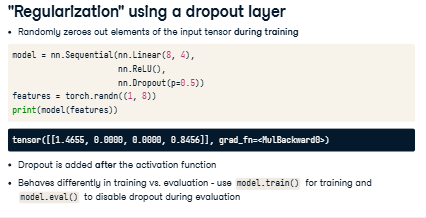

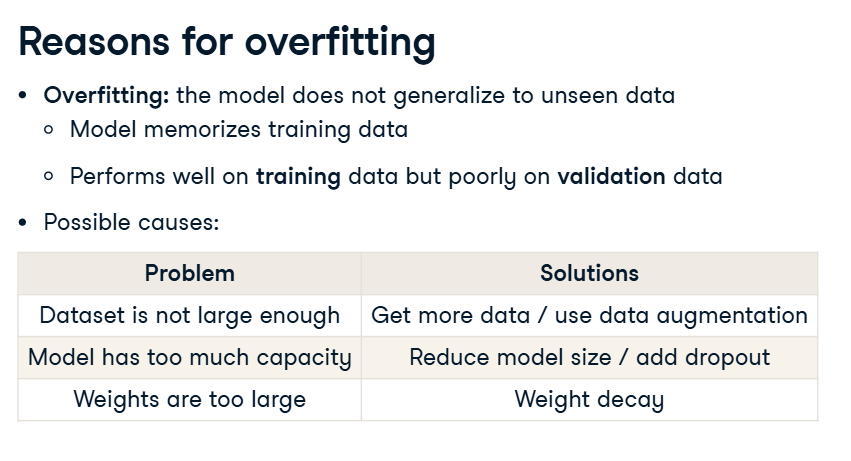

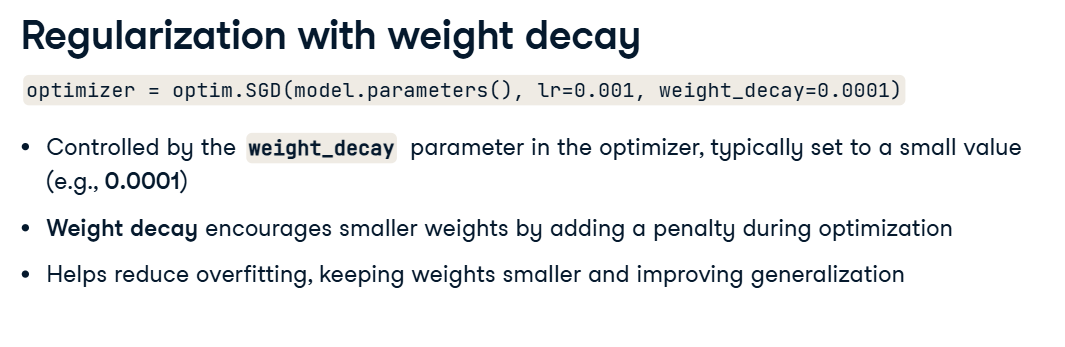

In [ ]:
# Model with Dropout
model = nn.Sequential(
    nn.Linear(8, 6),
    nn.Linear(6, 4),
    nn.Dropout(p=0.5))

# Forward pass in training mode (Dropout active)
model.train()
output_train = model(features)

In [ ]:
model = nn.Sequential(
    nn.Linear(8, 6),
    nn.Linear(6, 4),
    nn.Dropout(p=0.5))

model.train()
output_train = model(features)

# Forward pass in evaluation mode (Dropout disabled)
model.eval()
output_eval = model(features)

# Print results
print("Output in train mode:", output_train)
print("Output in eval mode:", output_eval)

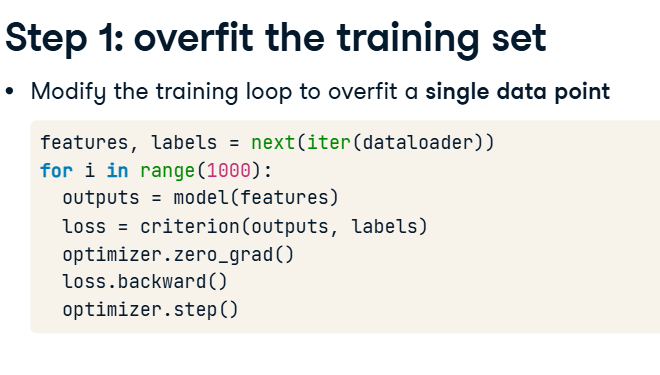

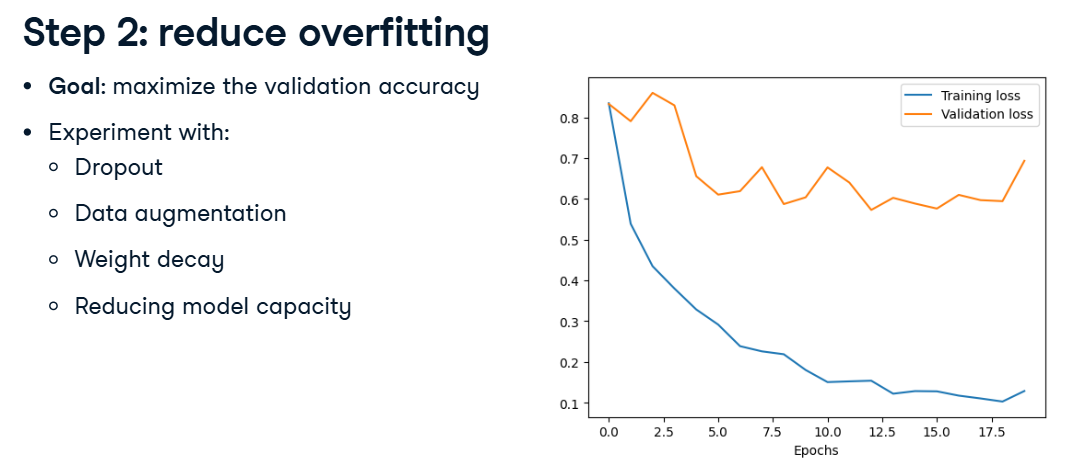

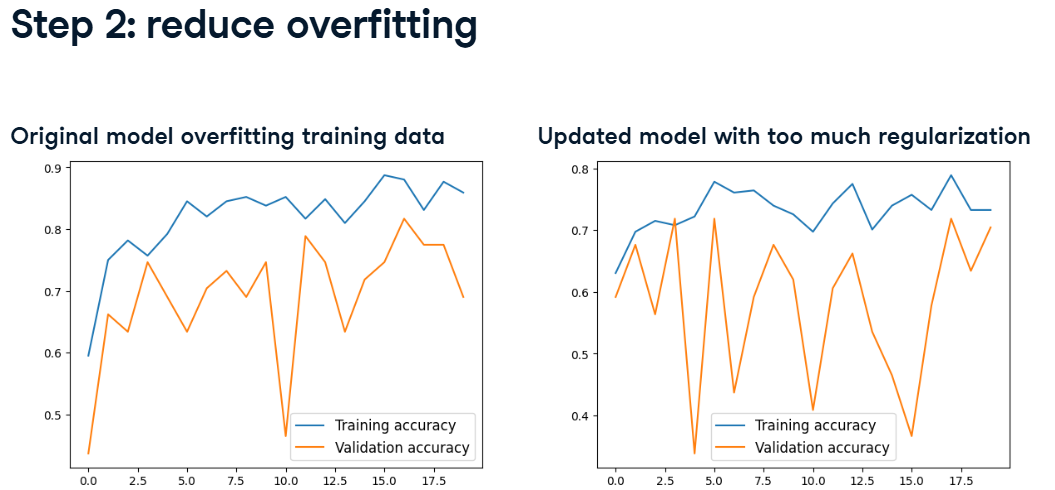

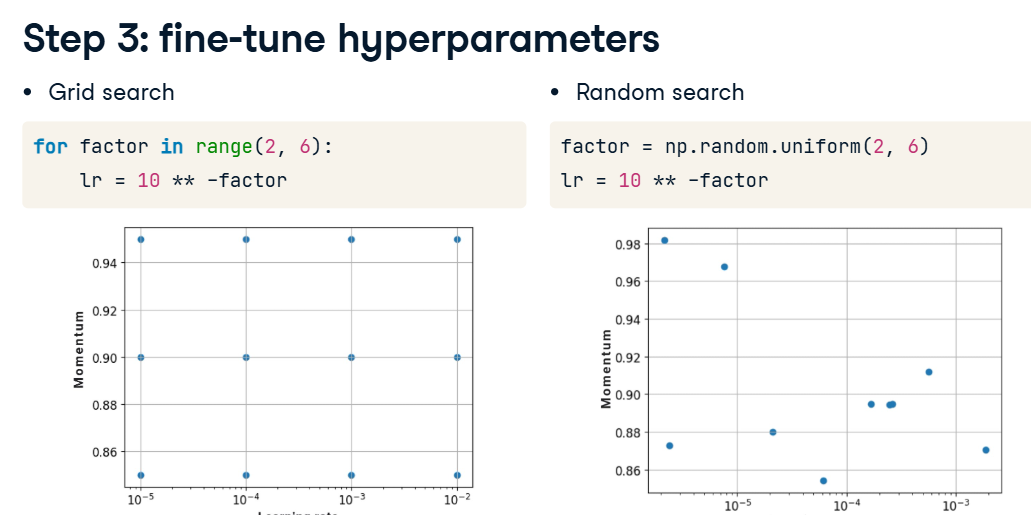

In [ ]:
values = []
for idx in range(10):
    # Randomly sample a learning rate factor between 2 and 4
    factor = np.random.uniform(2,4)
    lr = 10 ** -factor

    # Randomly select a momentum between 0.85 and 0.99
    momentum = np.random.uniform(0.85,0.99)

    values.append((lr, momentum))

plot_hyperparameter_search(values)